# Table of Contents

[Questionnaire only](#Questionnaire-only)
  - [Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?](#Can-the-answers-to-the-scientific-questions-be-used-to-predict-if-the-questionnaire-was-filled-before-or-after-the-game?)
    - [If scientific questions are coded by answers](#If-scientific-questions-are-coded-by-answers)
    - [If scientific questions are coded by correctedness](#If-scientific-questions-are-coded-by-correctedness)
[RedMetrics only](#RedMetrics-only)
  - [Can the score of a player be predicted with their RedMetrics data?](#Can-the-score-of-a-player-be-predicted-with-their-RedMetrics-data?)

[Questionnaire and RedMetrics](#Questionnaire-and-RedMetrics)
  - [Can the biology level of a player be predicted using the game data?](#Can-the-biology-level-of-a-player-be-predicted-using-the-game-data?)
  - [Can the gaming profile of a player be predicted using the game data?](#Can-the-gaming-profile-of-a-player-be-predicted-using-the-game-data?)
  - [Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly?](#Can-the-completion-time-of-each-chapter-be-used-to-predict-if-a-player-is-going-to-answer-a-specific-scientific-question-correctly?)
  - [Can the game data be used to predict the performance on a sub-group of scientific questions?](#Can-the-game-data-be-used-to-predict-the-performance-on-a-sub-group-of-scientific-questions?)
    - [Using an arbitrary classification of questions](#Using-an-arbitrary-classification-of-questions)
      - [Hard questions](#Hard-questions)
      - [Biobrick symbol recognition](#Biobrick-symbol-recognition)
      - [Easy questions](#Easy-questions)
    - [Using Bloom's taxonomy](#Using-Bloom's-taxonomy)
      - [knowledge questions](#knowledge-questions)
      - [comprehension questions](#comprehension-questions)
      - [application questions](#application-questions)
      - [analysis questions](#analysis-questions)
      - [synthesis questions](#synthesis-questions)
  - [Can the completion time be predicted from questionnaire answers?](#Can-the-completion-time-be-predicted-from-questionnaire-answers?)
    - [From the before questionnaire](#From-the-before-questionnaire)
    - [From the after questionnaire](#From-the-after-questionnaire)

In [1]:
%run dataFormating.ipynb

rmdfTestUsers read_csv success (1/3)
rmdf1522 read_csv success (2/3)
rmdf160 read_csv success (3/3)
gform read_csv success
gformFR read_csv success
temporalities set (user answer method)


IntProgress(value=0, max=2074)

IntProgress(value=0, max=1037)

profile info set


IntProgress(value=0, max=5)

IntProgress(value=0, max=4)

IntProgress(value=0, max=160)

IntProgress(value=0, max=125)

IntProgress(value=0, max=35)

FloatProgress(value=0.0, max=89.0)

dataFormating.ipynb:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  "rmdf160 read_csv success (3/3)\n",
dataFormating.ipynb:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  "rmdf160 read_csv success (3/3)\n",


In [2]:
import sklearn
print (sklearn.__version__)

0.19.1


In [3]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import RidgeCV, Ridge

from ipywidgets import FloatProgress
from IPython.display import display

from math import *

from scipy import stats
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import boxplot

# Questionnaire only

## Can the answers to the scientific questions be used to predict if the questionnaire was filled before or after the game?

Note: I am using only decision tree methods here because other methods like naive bayes do not make sense on categorical data

### If scientific questions are coded by answers

In [4]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defForms.loc[:, scientificColumns]
target = defForms["temporality"].astype('int') 

In [5]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.871072796934866

In [6]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.8990421455938696

In [7]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9045977011494252

Conclusion: Accuracy is around 85%. Not bad but we expected better (17/01/2018)

## If scientific questions are coded by correctedness

In [8]:
# Select columns that correspond to scientific questions
scientificColumns = [x for x in list(defCorrectedForms.columns.values) if x[0] == "Q"]

# Pick features and target
features = defCorrectedForms.loc[:, scientificColumns]
target = defCorrectedForms["temporality"].astype('int') 

In [9]:
# Classify using decision trees -accounts for the small size of the dataset and the categorical nature of the features
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0, max_features="auto")
scores = cross_val_score(clf, features, target)
scores.mean()

0.960536398467433

In [10]:
# Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9045977011494252

In [11]:
# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target)
scores.mean()

0.9383141762452109

Conclusion: Accuracy is around 80%. Not bad but we expected better (19/12/2017)

# RedMetrics only

## RedMetrics data

In [12]:
def getPosttestUserIds(gfdf):
    return gfdf[gfdf[QTemporality] == answerTemporalities[1]][QUserId].unique()

In [13]:
allDataWebgl1522 = prepareAllData(getAllUserVectorData(
    getPosttestUserIds(gfdfWebgl1522UniqueProfiles),
    rmdfWebgl1522UniqueProfiles,
    gfdfWebgl1522UniqueProfiles,
    _source = correctAnswers + demographicAnswers,
    _printDebug=False))

FloatProgress(value=0.0, max=15.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [14]:
allDataWebgl1522Volunteers = prepareAllData(getAllUserVectorData(
    getAllResponders(gfdfWebgl1522PretestPosttestUniqueProfilesVolunteers),
    rmdfWebgl1522PretestPosttestUniqueProfilesVolunteers,
    gfdfWebgl1522PretestPosttestUniqueProfilesVolunteers,
    _source = correctAnswers + demographicAnswers,
    _printDebug=False))

FloatProgress(value=0.0, max=2.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [15]:
allDataWebgl160 = prepareAllData(getAllUserVectorData(
    getPosttestUserIds(gfdfWebgl160UniqueProfiles),
    rmdfWebgl160UniqueProfiles,
    gfdfWebgl160UniqueProfiles,
    _source = correctAnswers + demographicAnswers,
    _printDebug=False))

FloatProgress(value=0.0, max=29.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [16]:
allDataWebgl160Volunteers = prepareAllData(getAllUserVectorData(
    getAllResponders(gfdfWebgl160PretestPosttestUniqueProfilesVolunteers),
    rmdfWebgl160PretestPosttestUniqueProfilesVolunteers,
    gfdfWebgl160PretestPosttestUniqueProfilesVolunteers,
    _source = correctAnswers + demographicAnswers,
    _printDebug=False))

FloatProgress(value=0.0, max=1.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


In [17]:
allDataPlaytestPhase2 = prepareAllData(getAllUserVectorData(
    getAllResponders(gfdfPlaytestPretestPosttestUniqueProfilesVolunteersPhase2),
    rmdfPlaytestPretestPosttestUniqueProfilesVolunteersPhase2,
    gfdfPlaytestPretestPosttestUniqueProfilesVolunteersPhase2,
    _source = correctAnswers + demographicAnswers,
    _printDebug=False))

FloatProgress(value=0.0, max=30.0)

C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  app.launch_new_instance()
C:\Users\Mikael\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  app.launch_new_instance()


## Can the score of a player be predicted with their RedMetrics data?

In [18]:
def getAnonymousData(allDataClassif):
    return allDataClassif.drop("anonymousID", axis = 1)

In [19]:
# columns to exclude: contain direct information on posttest score
dropPosttestColumns = allDataClassif.columns & (deltaQuestions + posttestQuestions + ["scoreposttest", "scoredelta"])

In [20]:
def getUnscaledFeatures(anonymousData):
    # Only select rows where scoreafter is not negative
    return anonymousData[anonymousData["scoreposttest"] >= 0].drop(dropPosttestColumns, axis = 1)

In [21]:
def getFeaturesTarget(allDataClassif, chosenModel = Lasso):
    # Remove id
    anonymousData = getAnonymousData(allDataClassif)

    # Get features and target
    # Only select rows where scoreafter is not negative
    unscaledFeatures = getUnscaledFeatures(anonymousData)
    target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

    # Center and scale data
    #features = preprocessing.scale(unscaledFeatures)

    # Center and scale data variant
    standardScaler = preprocessing.StandardScaler()
    standardScaler.fit(unscaledFeatures)
    features = standardScaler.transform(unscaledFeatures)
    
    # Run Lasso regression with cross-validation
    model = chosenModel()
    scores = cross_val_score(model, features, target, cv=10)
    boxplot(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    model.fit(features, target)    
    
    return scores, standardScaler, model, features, target, unscaledFeatures

Accuracy: 0.35 (+/- 0.61)


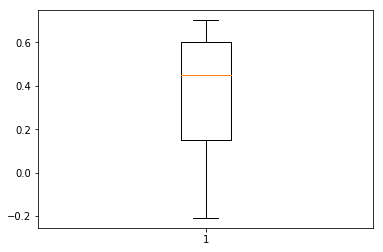

In [22]:
scores, standardScaler, model, features, target, unscaledFeatures = getFeaturesTarget(allDataClassif)

In [23]:
def getInvertedCriteria(allData, criteria):
    result = allData.copy()
    
    if not (len(result.columns & criteria) == len(criteria)):
        print("not all criteria are in input columns")
    
    for criterion in criteria:
        result[criterion] = 1 / (1 + result[criterion])
        
    return result

Accuracy: 0.37 (+/- 0.59)


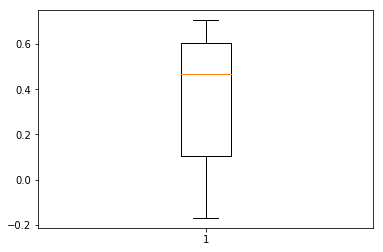

In [24]:
allDataClassifInv = getAllDataClassif(getInvertedCriteria(allData, totalTimesCriteria + completionTimesCriteria))
scoresInv, standardScalerInv, modelInv, featuresInv, targetInv, unscaledFeaturesInv = getFeaturesTarget(allDataClassifInv)

### Prediction of a single score

In [25]:
def getPrediction(standardScaler, model, unscaledX):
    X = standardScaler.transform([unscaledX])
    return model.predict(X)[0]

In [26]:
def getPredictionVsActual(standardScaler, model, allDataClassif):
    unscaledFeatures = getUnscaledFeatures(getAnonymousData(allDataClassif))
    
    result = pd.DataFrame(index = unscaledFeatures.index, columns=["predicted", "actual", "error"], data = -1)

    for userId in unscaledFeatures.index:
        unscaledX = unscaledFeatures.loc[userId].values
        actualScore = allDataClassif.loc[userId, "scoreposttest"]

        result.loc[userId, "predicted"] = getPrediction(standardScaler, model, unscaledX)
        result.loc[userId, "actual"] = actualScore
        result.loc[userId, "error"] = result.loc[userId, "predicted"] - result.loc[userId, "actual"]
        
    r2Coef = model.score(standardScaler.transform(unscaledFeatures), result["actual"].values)
        
    return result, r2Coef

#### use allData from online campaigns

In [27]:
samples = [allDataWebgl1522,
           allDataWebgl1522Volunteers,
           allDataWebgl160,
           allDataWebgl160Volunteers,
           allDataPlaytestPhase2
          ]

for sample in samples:
    _allDataClassif = getAllDataClassif(sample)
    result, r2Coef = getPredictionVsActual(standardScaler, model, _allDataClassif)
    print("{0:0=2d}".format(len(_allDataClassif)) + ":     " + str(r2Coef))
    
    _allDataClassifInv = getAllDataClassif(getInvertedCriteria(sample, totalTimesCriteria + completionTimesCriteria))
    resultInv, r2CoefInv = getPredictionVsActual(standardScalerInv, modelInv, _allDataClassifInv)
    print("{0:0=2d}".format(len(_allDataClassifInv)) + " inv: " + str(r2CoefInv))

15:     0.628551252441208
15 inv: 0.639847867322936
02:     0.6357800479787149
02 inv: 0.6996703842775331
29:     -0.014413160309862285
29 inv: -2.404330842694298
01:     0.0
01 inv: 0.0
30:     0.031059829180810627
30 inv: 0.0006239804092104118


### Determining the most important variables

In [28]:
def getLassoModelCoefficients(model, unscaledFeatures, useAbs = True):
    nonNullIndices = np.nonzero(model.coef_)    
    data = model.coef_[nonNullIndices]
    if useAbs:
        data = abs(model.coef_[nonNullIndices])    
    lassoModelParameters = pd.Series(
        index = unscaledFeatures.columns[nonNullIndices],
        data = data
    ).sort_values()
    return lassoModelParameters

In [29]:
getLassoModelCoefficients(model, unscaledFeatures)

pretest Name: PR                            0.013231
pretest Function - biology: CDS             0.018936
maxChapter                                  0.059118
pretest Genotype and phenotype              0.061578
scorepretest                                0.119158
pretest Name: CDS                           0.432130
ch04completion                              0.488416
pretest Ampicillin antibiotic               0.596285
pretest Want to learn more about Biology    0.751786
ch06completion                              1.351828
ch05completion                              1.476089
dtype: float64

In [30]:
getLassoModelCoefficients(modelInv, unscaledFeatures)

pretest Studied biology                     0.002263
pretest Genotype and phenotype              0.014219
pretest Name: PR                            0.084836
pretest Device: PBAD:RBS:ARA:TER            0.085873
scorepretest                                0.103835
maxChapter                                  0.223995
ch04total                                   0.392676
pretest Name: CDS                           0.417127
ch05completion                              0.491308
pretest Ampicillin antibiotic               0.498824
ch07total                                   0.590746
pretest Want to learn more about Biology    0.645466
ch05total                                   1.899962
dtype: float64

In [31]:
#unscaledFeatures = getUnscaledFeatures(getAnonymousData(allDataClassifWebgl160Volunteers))
#unscaledX = unscaledFeatures.iloc[0].values
#X = standardScaler.transform([unscaledX])
#model.predict(X)[0]

#X = (unscaledX - standardScaler.mean_) / standardScaler.scale_
#model.predict([X])[0]

#np.dot(model.coef_, X) + model.intercept_

### Prediction of all scores

In [32]:
if False:
    anonymousData = getAnonymousData(allDataClassif)
    
    sortedUnscaledFeatures = anonymousData[anonymousData["scoreposttest"] >= 0].sort_values(by="scoreposttest").drop(dropPosttestColumns, axis = 1)
    sortedTarget = sorted(anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"])

    # Center and scale data variant
    sortedFeatures = standardScaler.transform(sortedUnscaledFeatures)

    x = range(len(sortedFeatures))
    alpha = 0.5

    fig, ax = plt.subplots()
    plt.title('Actual vs predicted score')
    plt.xlabel('User index')
    plt.ylabel('Score')
    #plt.plot(x, model.predict(sortedFeatures), kind = 'bar')
    #plt.plot(x, sortedTarget)
    ax.bar(x, model.predict(sortedFeatures), alpha=alpha, label='predicted', linewidth=0)
    ax.bar(x, sortedTarget,                  alpha=alpha, label='actual')
    ax.legend()
    fig.tight_layout()
    plt.show()

Conclusion: Score cannot be predicted by the table of RedMetrics data (19/07/2018).

## Second degree polynomial

In [33]:
def getFeaturesTargetSecondDegreePolynomial(allDataClassif, chosenModel = Lasso):
    # Remove id
    anonymousData = getAnonymousData(allDataClassif)

    # Get features and target
    # Only select rows where scoreafter is not negative
    unscaledFeatures = getUnscaledFeatures(anonymousData)
    target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    unscaledFeatures = secondDegreeFeatures.fit_transform(unscaledFeatures)

    # Center and scale data variant
    standardScaler = preprocessing.StandardScaler()
    standardScaler.fit(unscaledFeatures)
    features = standardScaler.transform(unscaledFeatures)
    
    # Run Lasso regression with cross-validation
    model = chosenModel()
    scores = cross_val_score(model, features, target, cv=10)
    boxplot(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    model.fit(features, target)
    
    return scores, standardScaler, model, features, target, unscaledFeatures

Accuracy: 0.34 (+/- 0.62)
Accuracy: 0.37 (+/- 0.61)


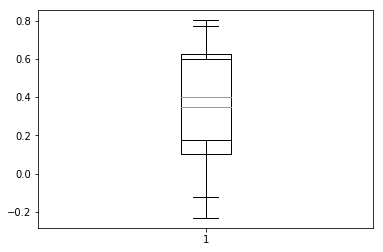

In [34]:
getFeaturesTargetSecondDegreePolynomial(allDataClassif);
getFeaturesTargetSecondDegreePolynomial(allDataClassifInv);

Conclusion: Score cannot be predicted by the table of RedMetrics data + second degree polynomial (30/01/2018)

Let's try by reducing the number of features

Accuracy: 0.32 (+/- 0.65)


C:\Users\Mikael\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


ch05completion    1.497631
maxChapter        1.901020
dtype: float64

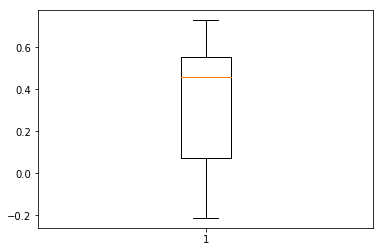

In [35]:
# Remove id
anonymousData = getAnonymousData(allDataClassif)

# Get features and target
# Only select rows where scoreafter is not negative
unscaledFeatures = anonymousData[anonymousData["scoreposttest"] >= 0]

#unscaledFeatures = unscaledFeatures[["craft", "death", "add", "remove", "reach", "maxChapter"] + totalTimesCriteria + completionTimesCriteria]
#unscaledFeatures = unscaledFeatures[["craft", "death", "add", "remove", "reach", "maxChapter"]]
#unscaledFeatures = unscaledFeatures[totalTimesCriteria]
#unscaledFeatures = unscaledFeatures[completionTimesCriteria]
unscaledFeatures = unscaledFeatures[["maxChapter", "ch05completion", "ch07completion", "ch07total", "ch09total"]]

target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(unscaledFeatures)

# Center and scale data
features = preprocessing.scale(unscaledFeatures)

# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(features, target)

getLassoModelCoefficients(model, unscaledFeatures)

In [36]:
def getScoresMean(allDataClassif, columnsSubset):
    anonymousData = getAnonymousData(allDataClassif)
    unscaledFeatures = anonymousData[anonymousData["scoreposttest"] >= 0]
    unscaledFeatures = unscaledFeatures[columnsSubset]
    target = anonymousData[anonymousData["scoreposttest"] >= 0]["scoreposttest"]
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(unscaledFeatures)
    features = preprocessing.scale(unscaledFeatures)
    model = Lasso()
    scores = cross_val_score(model, features, target, cv=10)
    return scores.mean()

In [37]:
# number of possibles subsets of size n of a set of size 96
import scipy.special
scipy.special.binom(96, 3),\
scipy.special.binom(96, 4),\
scipy.special.binom(96, 5),\
scipy.special.binom(96, 6),\
scipy.special.binom(96, 7),\
scipy.special.binom(96, 8)

(142880.0, 3321960.0, 61124064.0, 927048304.0, 11919192480.0, 132601016340.0)

In [38]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [ ]:
import itertools
import time
import scipy.special
import warnings
from ipywidgets import Textarea, FloatText, ToggleButton, Checkbox
warnings.filterwarnings('ignore')


#adc = allDataClassif
adc = allDataClassifInv.copy()

criteria = list(\
    set(adc.columns)\
    - set(adc.columns & \
          (deltaQuestions + posttestQuestions + ["scoreposttest", "scoredelta", 'scoreundefined', "anonymousID"]))\
)
maxScore = 0
columns = []
i = 0
subsetSize = 5
combinations = scipy.special.binom(len(criteria), subsetSize)
print("#combinations="+str(combinations))
iterations = combinations+2

_progress = IntProgress(min=0, max=iterations)
_intText = IntText(0)
_currentBest = FloatText(0.0)
_currentCriteria = Textarea("")
#_stopButton = ToggleButton(value=False, description='Stop')
#_stopCheckbox = Checkbox(value=False, description='Stop')

display(_progress)
display(_intText)
display(_currentBest)
display(_currentCriteria)
#display(_stopButton)
#display(_stopCheckbox)

iterator = itertools.combinations(criteria, subsetSize)

start_time = time.time()
for columnsSubset in iterator:
    #if _stopButton.value or _stopCheckbox.value or (i >= iterations):
    if (i >= iterations):
        break
    else:
        i += 1
        _progress.value += 1
        _intText.value+= 1
        score = getScoresMean(adc, list(columnsSubset))
        if score > maxScore:
            maxScore = score
            _currentBest.value = score
            columns = columnsSubset
            _currentCriteria.value = str(columnsSubset)
            
print("--- executed %s / %s in %s seconds ---" % (i, combinations, time.time() - start_time))

maxScore, list(columnsSubset)

#combinations=57940519.0


IntProgress(value=0, max=57940521)

IntText(value=0)

FloatText(value=0.0)

Textarea(value='')

In [ ]:
# how long to compute all
(17 * 61124064 / 1000) / 3600,\
(249 * 57940519 / 15000) / 3600,\
(204 * 57940519 / 15000) / 3600,

In [ ]:
# how much computed in some duration
durationSeconds = 5 * 60
durationSeconds * 1000 / 17

### allDataClassif

0.389994800369642, ['ch12completion', 'totalTime', 'pretest Studied biology']

0.3899953439583282, ['scoreundefined', 'pretest Want to learn more about Biology', 'ch12total', 'ch10total', 'pretest Name: PR')]

### allDataClassifInv

0.39870229095205095, ['pretest Want to learn more about Biology', 'ch01completion', 'reach', 'pretest Example: CDS', 'pretest Played Hero.Coli']

['pretest Want to learn more about Biology', 'ch01completion', 'pretest Device: PCONS:RBS:FLHDC:TER', 'ch05total', 'scorepretest']

Conclusion: Tried different combinations, but cannot find any interesting regression (02/02/2018)

# Questionnaire and RedMetrics

## Can the biology level of a player be predicted using the game data?

In [ ]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData[anonymousData["scoreposttest"] >= 0]
features = features.loc[:,"sessionsCount":"completionTime"]
target = anonymousData[anonymousData["scoreposttest"] >= 0]["biologyStudy"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

In [ ]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the gaming profile of a player be predicted using the game data?

In [ ]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
# Only select rows where scoreafter is not negative
features = anonymousData.loc[:,"sessionsCount":"completionTime"]
target = sum(anonymousData["gameInterest"], anonymousData["gameFrequency"])

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

In [ ]:
# Run Lasso regression with cross-validation
model = Lasso()
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores

Conclusion: No (30/01/2018)

## Can the completion time of each chapter be used to predict if a player is going to answer a specific scientific question correctly?

In [ ]:
# Given a question tag, plot scores of cross-validated model
def tryClassification(data, scientificQuestion):
    # Remove id
    anonymousData = data.drop("anonymousID", axis = 1)

    # Get features and target
    # Only select rows where scoreafter is not negative
    features = anonymousData[anonymousData["scoreposttest"] >= 0]
    features = features.iloc[:,24:37]
    target = anonymousData[anonymousData["scoreposttest"] >= 0].loc[:,scientificQuestion].astype('int')

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)
    
    # Classify using extra tree classifiers, more random than random forest methods
    clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
    scores = cross_val_score(clf, features, target, cv=5)
    
    # Display plot
    fig, ax = plt.subplots()
    boxplot(scores)
    
    return [scores.mean(), scores.std()]

In [ ]:
allScores = pd.DataFrame(index = ["Mean", "Var"])
for question in ["QGenotypePhenotype", "QBioBricksDevicesComposition", "QAmpicillin", "QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator", "QDeviceRbsPconsFlhdcTer", "QDevicePconsRbsFlhdcTer", "QDevicePbadRbsGfpTer", "QDevicePbadGfpTbsTer", "QDeviceGfpRbsPconsTer", "QDevicePconsGfpRbsTer", "QDeviceAmprRbsPconsTer", "QDeviceRbsPconsAmprTer", "QGreenFluorescence", "QUnequipDevice", "QDevicePbadRbsAraTer"]:
    questionTag = question
    scores = tryClassification(gameAndCorrectedAfterDataClassif, questionTag)
    allScores[questionTag] = scores
allScores

Conclusion: Redmetrics can be used to predict answers to certain scientific questions (29/05/2018)
TODO Raphael: Check which questions you want additional analysis for

## Can the game data be used to predict the performance on a sub-group of scientific questions?

In [ ]:
def getBoxplot(scores, title = ''):
    # figure related code
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.boxplot(scores)
    ax.set_title(title)

In [ ]:
#pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1).columns

In [ ]:
#anonymousData.columns.values

In [ ]:
ingameCriteria = ['sessionsCount', 'scoreposttest', 'scoreundefined', 'complete',
       'configure', 'craft', 'death', 'equip', 'unequip', 'add', 'remove',
       'gotourl', 'pickup', 'reach', 'restart', 'selectmenu', 'start',
       'scoredelta', 'maxChapter', 'efficiency', 'thoroughness', 'fun',
       'completionTime', 'ch00completion', 'ch01completion',
       'ch02completion', 'ch03completion', 'ch04completion',
       'ch05completion', 'ch06completion', 'ch07completion',
       'ch08completion', 'ch09completion', 'ch10completion',
       'ch11completion', 'ch12completion', 'ch13completion',
       'ch14completion', 'ch00total', 'ch01total', 'ch02total',
       'ch03total', 'ch04total', 'ch05total', 'ch06total', 'ch07total',
       'ch08total', 'ch09total', 'ch10total', 'ch11total', 'ch12total',
       'ch13total', 'ch14total', 'totalTime']

In [ ]:
# boxplot function
#  questions: array of strings of question names
def getPerformanceFromQuestionGroup(questions,
                                    thresholdPercentage = 1.0,
                                    extraTreesClassifier = False,
                                    randomForestClassifier = False,
                                    lasso = False,
                                    histTarget = 0
                                   ):
    # Remove id
    anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

    # Get features and target
    #features = pd.concat([anonymousData.loc[:,"sessionsCount":"completionTime"], anonymousData.loc[:,"gameInterest":"previousPlay"]], axis=1)
    features = anonymousData.loc[:,ingameCriteria]
    
    digitalTarget = anonymousData.loc[:, questions].astype(int).sum(axis=1)
    categoricalTarget = digitalTarget.apply(lambda x: 0 if x < thresholdPercentage*len(questions) else 1)

    # Add polynomial features
    secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    features = secondDegreeFeatures.fit_transform(features)

    # Center and scale data
    features = preprocessing.scale(features)

    if extraTreesClassifier:
        # Classify using extra tree classifiers, more random than random forest methods
        clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget, cv=10)
        print("ExtraTreesClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "ExtraTreesClassifier boxplot")
        
    if randomForestClassifier:
        # Classify using random forests -accounts for the small size of the dataset and the categorical nature of the features, limit overfitting
        clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
        scores = cross_val_score(clf, features, categoricalTarget)
        print("RandomForestClassifier scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "RandomForestClassifier boxplot")
        
    if lasso:
        # Run Lasso regression with cross-validation
        model = Lasso()
        scores = cross_val_score(model, features, digitalTarget, cv=10)
        print("Lasso scores mean: " + str(scores.mean()))

        # Display plot
        getBoxplot(scores, "Lasso boxplot")
        
    if histTarget > 0:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist(target, bins = range(histTarget))

### Using an arbitrary classification of questions

#### Hard questions

In [ ]:
hardQuestions = ["QBBFunctionPR", "QBBNameOperator", "QDevicePbadRbsAraTer"]
getPerformanceFromQuestionGroup(hardQuestions, thresholdPercentage = 0.5, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: Very high quality prediction (29/05/18)

### Biobrick symbol recognition

In [ ]:
bbSymbolRecognition = ["QBBNamePlasmid", "QBBFunctionTER", "QBBNamePromoter", "QBBFunctionGameCDS", "QBBNameTerminator", "QBBFunctionBiologyCDS", "QBBNameRBS", "QBBExampleCDS", "QBBNameCDS", "QBBFunctionPR", "QBBFunctionRBS", "QBBFunctionPlasmid", "QBBNameOperator"]
getPerformanceFromQuestionGroup(bbSymbolRecognition, thresholdPercentage = 0.6, extraTreesClassifier = True, randomForestClassifier = True, lasso = True)

Conclusion: No apparent possible prediction (1/02/2018)

### Easy questions

In [ ]:
easyQuestions = ["QBioBricksDevicesComposition", "QDeviceRbsPconsFlhdcTer", "QGreenFluorescence"]
getPerformanceFromQuestionGroup(easyQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

Conclusion: Inconclusive (01/02/2018)

### Using Bloom's taxonomy

Not interpreted yet.

#### knowledge questions

In [ ]:
knowledgeQuestions = ["QAmpicillin",
                      "QBBNamePlasmid",
                      "QBBNamePromoter",                      
                      "QBBNameTerminator",
                      "QBBNameRBS",
                      "QBBNameCDS",
                      "QBBNameOperator",
                     ]
getPerformanceFromQuestionGroup(knowledgeQuestions, thresholdPercentage = 0.7, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### comprehension questions

In [ ]:
comprehensionQuestions = ["QBioBricksDevicesComposition",
                      "QBBFunctionTER",
                      "QBBFunctionPlasmid",                      
                      "QUnequipDevice",
                     ]
getPerformanceFromQuestionGroup(comprehensionQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### application questions

In [ ]:
applicationQuestions = ["QGenotypePhenotype",
                      "QBBExampleCDS",
                      "QGreenFluorescence",
                     ]
getPerformanceFromQuestionGroup(applicationQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### analysis questions

In [ ]:
analysisQuestions = ["QBBFunctionGameCDS",
                      "QBBFunctionBiologyCDS",
                      "QBBFunctionPR",
                      "QBBFunctionRBS",
                      "QDevicePbadRbsAraTer",
                     ]
getPerformanceFromQuestionGroup(analysisQuestions, thresholdPercentage = 0.7, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

#### synthesis questions

In [ ]:
synthesisQuestions = ["QDeviceRbsPconsFlhdcTer",
                      "QDevicePconsRbsFlhdcTer",
                      "QDevicePbadRbsGfpTer",                      
                      "QDevicePbadGfpTbsTer",
                      "QDeviceGfpRbsPconsTer",
                      "QDevicePconsGfpRbsTer",
                      "QDeviceAmprRbsPconsTer",
                      "QDeviceRbsPconsAmprTer",
                     ]
getPerformanceFromQuestionGroup(synthesisQuestions, thresholdPercentage = 1.0, extraTreesClassifier = True, randomForestClassifier = True, lasso = True, histTarget = 14)

## Can the completion time be predicted from questionnaire answers?

### From the before questionnaire

In [ ]:
# Remove id
anonymousData = gameAndCorrectedBeforeDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

In [ ]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=10000, alpha=10)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

In [ ]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()
sum(target)/len(target)

Conclusion: No (01/02/2018)

### From the after questionnaire

In [ ]:
# Remove id
anonymousData = gameAndCorrectedAfterDataClassif.drop("anonymousID", axis = 1)

# Get features and target
lastColumn = 'gender_Male'
for potentialLastColumn in ['gender_Other', 'gender_Prefer not to say']:
    if potentialLastColumn in anonymousData.columns:
        lastColumn = potentialLastColumn
features = anonymousData.loc[:,"gameInterest":lastColumn]
target = anonymousData.loc[:,"completionTime"]

# Add polynomial features
secondDegreeFeatures = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
features = secondDegreeFeatures.fit_transform(features)

# Center and scale data
features = preprocessing.scale(features)

In [ ]:
# Run Lasso regression with cross-validation
model = Lasso(max_iter=1000000)
scores = cross_val_score(model, features, target, cv=10)
boxplot(scores)
scores.mean()

In [ ]:
# Try classification
target = target.apply(lambda x: 0 if x < 7200 else 1) #0 if short, 1 if long

# Classify using extra tree classifiers, more random than random forest methods
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0, bootstrap=True)
scores = cross_val_score(clf, features, target, cv=10)
    
# Display plot
boxplot(scores)
scores.mean()

Conclusion: Yes (29/05/18)

In [ ]:
sum(target)

In [ ]:
len(target)

Conclusion: Yes but very unbalanced classes (29/05/18)